#  Install Dependencies and Bring in Data

In [3]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\sashank\AppData\Local\Temp\pip-install-_se8fisb\tensorflow-gpu_1003482d6a5c46b7b73ec7591ea11bb4\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did n

In [4]:
pip install tensorflow==2.11.*

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [6]:
pip install youtube-comment-scraper-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from youtube_comment_scraper_python import *
youtube.open("https://www.youtube.com/watch?v=C5duQyX7Gec")
response=youtube.video_comments()
data=response['body']

Starting DataKund...


In [7]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'),low_memory=False)
df.dropna(how='all')

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
15472,28da49d589de1153,"Sock Puppet\nDefend yourself, why don't ya? ht...",0,0,0,0,0,0
15473,28da8a3204519328,Richard Stallman's Johnson \n\nWhat is your ob...,0,0,0,0,0,0
15474,28dada15b6657031,One Railway \nWhy don't we create another arti...,0,0,0,0,0,0
15475,28daf85d0436a11d,LOL. At least she doesn't have to be with you ...,0,0,0,0,0,0


In [8]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Data Preprocessing

In [9]:
!pip list

Package                        Version
------------------------------ --------------------
absl-py                        1.4.0
aiofiles                       23.1.0
aiohttp                        3.8.3
aiosignal                      1.3.1
alabaster                      0.7.12
altair                         4.2.2
anaconda-client                1.11.0
anaconda-navigator             2.3.1
anaconda-project               0.11.1
anyio                          3.5.0
appdirs                        1.4.4
argon2-cffi                    21.3.0
argon2-cffi-bindings           21.2.0
arrow                          1.2.2
astroid                        2.11.7
astropy                        5.1
astunparse                     1.6.3
async-timeout                  4.0.2
atomicwrites                   1.4.0
attrs                          21.4.0
Automat                        20.2.0
autopep8                       1.6.0
Babel                          2.9.1
backcall                       0.2.0
backports.func

In [10]:
from tensorflow.keras.layers import TextVectorization

In [11]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [12]:
MAX_FEATURES = 150000 # number of words in the vocab

In [13]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [14]:
vectorizer.adapt(X.values)

In [15]:
vectorized_text = vectorizer(X.values)

In [16]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(10000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [17]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

# Create Sequential Model(LSTM-CNN)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [19]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [20]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          4800032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [22]:
history = model.fit(train, epochs=1, validation_data=val)

677/677 [==============================] - 1009s 1s/step - loss: 0.1137 - val_loss: 0.0733


In [23]:
from matplotlib import pyplot as plt

In [24]:
#plt.figure(figsize=(8,5))
#pd.DataFrame(history.history).plot()
#plt.show()

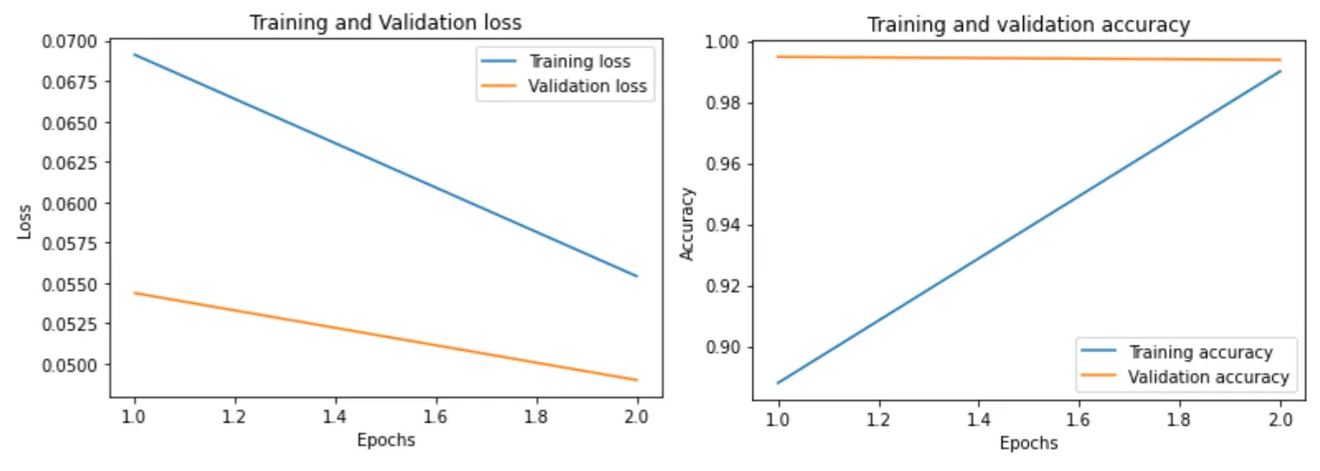

#  Make Predictions

In [25]:
batch = test.as_numpy_iterator().next()

In [26]:
input_text = vectorizer('You freaking suck!')

In [27]:
model.predict(np.array([input_text]))

1/1 [==============================] - 2s 2s/step


array([[0.9407437 , 0.12793554, 0.8750572 , 0.01983965, 0.8039947 ,
        0.12421884]], dtype=float32)

In [28]:
res = model.predict(np.expand_dims(input_text,0))
res

1/1 [==============================] - 0s 192ms/step


array([[0.9407437 , 0.12793554, 0.8750572 , 0.01983965, 0.8039947 ,
        0.12421884]], dtype=float32)

In [29]:
(res > 0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [30]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [31]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 308ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [32]:
res.shape

(1, 6)

# Evaluate Model

In [33]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 294ms/step


In [36]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.74301677942276, Recall:0.7409470677375793, Accuracy:0.4479166567325592


#  Test and Gradio

In [37]:
!pip install gradio jinja2

In [38]:
pip install typing_extensions

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install dataclasses

Note: you may need to restart the kernel to use updated packages.


In [40]:
import tensorflow as tf
from dataclasses import dataclass
import gradio as gr
from typing_extensions import dataclass_transform

In [41]:
model.save('toxicity.h5')

In [42]:
model = tf.keras.models.load_model('toxicity.h5')

In [43]:
input_str = vectorizer('hey i freaken hate you!')

In [44]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 2s 2s/step


In [45]:
res

array([[0.78507847, 0.03904782, 0.63210803, 0.01494944, 0.5177523 ,
        0.08401479]], dtype=float32)

In [46]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [47]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Enter the comment to calculate toxicity'),
                        outputs='text')

C:\Users\sashank\anaconda3\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\sashank\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\sashank\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [48]:


interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
1/1 [==============================] - 0s 223ms/step

Could not create share link, please check your internet connection.
